# 2. 확률적 선형 회귀모형 


- Data가 확률변수로부터 생성된 표본으로 가정(모델 가정)
- OLS
- 가정 3가지


### 1) y, $\epsilon$ 선형정규분포 가정
- y는 가우시안 정규분포(**기대값**: x의 선형 조합으로 결정, y는 조건부 정규분포)
- $\theta = (w, \sigma^2)$

### $$y \sim \mathcal{N}{(\text{기댓값}w^Tx, \sigma^2)}$$
### $$\text{y확률밀도함수} \; p(y \vert x, \theta)
=\mathcal{N}(y \vert w^Tx, \sigma^2)$$

- $\epsilon(disturbance) = y - w^Tx$ (y 평균제거 벡터)


### $$p(\epsilon \vert \theta) = \mathcal{N}(0, \sigma^2)$$


- 주의: x, y 정규분포일 필요 없음. y도 조건부 정규분포.

### 2) 외생성(Exogeneity) 가정
- 잡음 $\epsilon$의 **기댓값은 독립변수x와 상관없이 항상 0**


$$E[\epsilon \vert x] = 0$$
$$E[E[\epsilon \vert x]]= E[\epsilon]=0$$


- $\epsilon$ 과 x의 상관관계 0

$$E[\epsilon x] = 0$$


### 3) 조건부 독립 가정
- i,j 번째 샘플의 잡음 $\epsilon_i$, $\epsilon_j$의 공분산 값은 x와 상관없이 항상 0(i, j 독립)
- 잡음에는 이미 x로 설명될 수 있는 성분 제외


$$Cov[\epsilon_i, \epsilon_j \vert x]=0 \; (i,j = 1,2, \ldots, N)$$
$$E[\epsilon_i \epsilon_j]=0$$
$$즉, \; Cov[\epsilon] = E[\epsilon \epsilon^T] = \sigma^2 I$$

# 3. 최대 가능도 방법을 사용한 선형회귀분석
- 확률론적 선형 회귀모형의 가정
- 최대 가능도 방법(Maximum Likelihood Estimation)
- 값은 OLS와 동일
- $\theta = (w, \sigma^2)$
- x상수, $\theta$ 변수
$$\mathcal{L}(\theta;x)=p(x;\theta)=p(x \vert \theta)$$ 

### $$\dfrac{d}{dw}LL$$


### $$\hat{w} = (X^TX)^{-1}X^Ty$$

# 4. 잔차residual의 분포
- $e = y - \hat{w}^Tx$ (cf. $\epsilon = y - w^Tx$ )
- 잡음 $\epsilon$과 잔차 e의 관계: **잔차e는 잡음$\epsilon$의 선형변환(linear transform)**
- 따라서 잔차e 또한 정규분포 따름


### $$ e = M \epsilon $$
$$ (\hat{y} = Hy, \; e = My)$$

- 더불어 잔차의 기대값 또한 **x와 상관없이 0**
- x와 상관관계 없어야 정상
- cf $독립\in상관관계X$
### $$E[e \vert x] = 0 $$

### 잔차의 정규성 검정(2 가지)

In [39]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

x0, y, coef = make_regression(n_samples=100, n_features=1, 
                             coef=True, noise=20)
df = pd.DataFrame({"x": x0[:,0], "y": y})
result = sm.OLS.from_formula("y ~ x", data=df).fit()

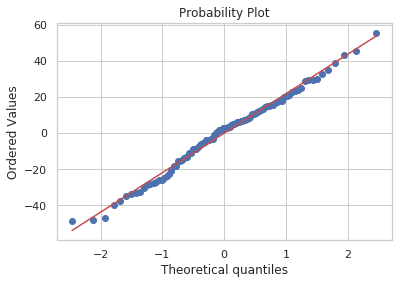

In [65]:
# 정규분포플롯
%matplotlib inline
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [70]:
# 잔차의 정규성 검정(귀무가설: 정규분포)
chi2, pvalue = sm.stats.omni_normtest(result.resid)
chi2, pvalue

(0.31421933759306087, 0.8546103295918446)

In [68]:
Jarque, pvalue, skew, kurtoise = sm.stats.jarque_bera(result.resid)
pvalue

0.7963298456824297

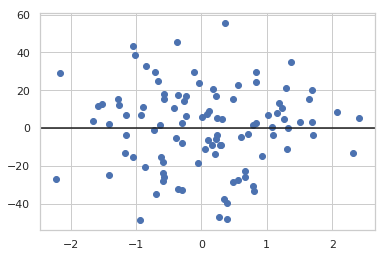

In [105]:
# x에 따른 잔차 분포 랜덤(상관관계 없음)
plt.scatter(x0[:, 0], result.resid)
plt.axhline(y=0, c='k')
plt.show()

# 5. 단일 계수 t-검정
## 5.1 회귀계수의 표준오차 $se_i$
- Standard Error or Regression Coefficient
- 정규화된 모수 오차$\dfrac{\hat{w}_i - w_i}{se_i}$는 자유도가 N-K인 표준 스튜던트 t-분포를 따름

## 5.2 단일 계수 t-검정
- 정규화된 모수 오차 $\dfrac{\hat{w}_i - w_i}{se_i}$를 검정통계량으로 사용
$$H_0 : w_i = 0(i=0, \cdots, K-1)$$

# 6.회귀분석 F-검정
- 전체독립 변수 모두 의미 없음을 검증
- 기각의 정도가 다름
$$ H_0 : w_0=\cdots=w_{K-1}=0$$


- 여러 모형의 유의확률 비교하여 성능 비교 가능

# 부록. 부트스트래핑bootstrapping
- OLS 가중치의 오차범위, 신뢰구간 파악
- 가중치 추정값을, 여러가지 다른 표본 데이터 집합으로 구하여 분포확인
- unordered resampling with replacement

연습

In [28]:
from sklearn.datasets import make_regression
x, y, coef = make_regression(n_samples=100, n_features=1, noise=20,\
                             coef=True, bias=10)
print('coef: ', coef)

coef:  68.17597562344977


In [29]:
# 회귀분석
import statsmodels.api as sm
dfx0 = pd.DataFrame(x, columns=["x1"])
dfy = pd.DataFrame(y, columns=["y"])
dfx = sm.add_constant(dfx0)

model = sm.OLS(dfy, dfx)
result = model.fit()

In [45]:
# 회귀분석 모수
result.params

const     8.069649
x1       68.928161
dtype: float64

In [46]:
# 재표본화
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfx2 = dfx.iloc[idx]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfx2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.x1

In [54]:
np.shape(params_w0)

(1000,)

w0 std: 1.9313039793683848
w1 std: 2.1201673045582767


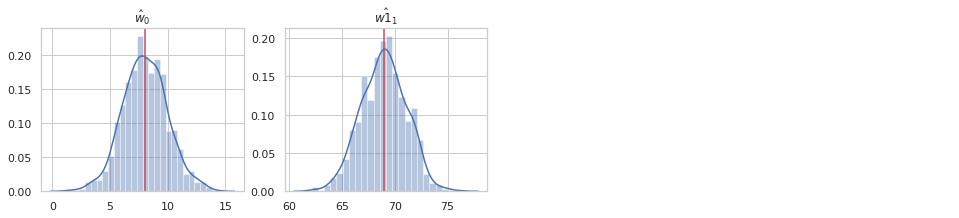

In [91]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(8,3))

sns.distplot(params_w0, ax=axes[0]).set_title('$\hat{w}_0$')
axes[0].axvline(params_w0.mean(), c='r', )
sns.distplot(params_w1, ax=axes[1]).set_title('$\hat{w1}_1$')
axes[1].axvline(params_w1.mean(), c='r')
print('w0 std: ', params_w0.std(), '\n', 'w1 std: ', params_w1.std(), sep='')
plt.show()

In [80]:
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.912   
Dependent Variable: y                AIC:                877.6006
Date:               2018-11-05 08:05 BIC:                882.8110
No. Observations:   100              Log-Likelihood:     -436.80 
Df Model:           1                F-statistic:        1027.   
Df Residuals:       98               Prob (F-statistic): 9.70e-54
R-squared:          0.913            Scale:              371.79  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      8.0696     1.9591    4.1190   0.0001    4.1818   11.9575
x1        68.9282     2.1508   32.0481   0.0000   64.6600   73.1963
-----------------------------------------------------------------
Omnibus:              0.267        Durbin-Watson:           2.075
Prob(Omnibus):   